In [1]:
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

## 1. Scatter Plot(산점도)

Scatter plot은 점을 사용하여 두 feature간의 관계를 알기 위해 사용하는 그래프

* 직교 좌표계에서 x축/y축에 feature 값을 매핑해서 사용
* `.scatter()`

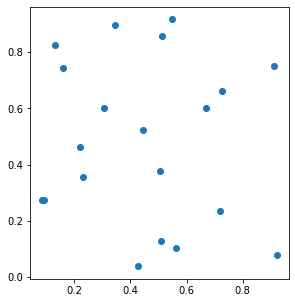

In [16]:
fig = plt.figure(figsize=(5, 5))
# aspect : 가로축과 세로축의 스케일을 맞춰줌 1은 1:1 비율
ax = fig.add_subplot(111, aspect=1)

x = np.random.rand(20)
y = np.random.rand(20)

ax.scatter(x,y)
plt.show()

#### 구별하는 요소
1. 색상(color)
2. 마커(marker) : [마커의 종류](https://matplotlib.org/stable/api/markers_api.html)
3. 크기(size)


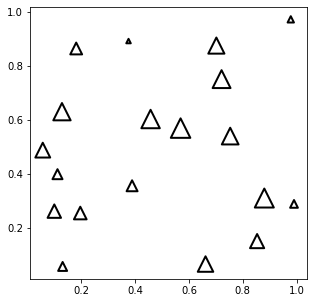

In [15]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, aspect=1)

x = np.random.rand(20)
y = np.random.rand(20)

# size는 배열로 넣어주면 크기가 다양해진다.
s = np.arange(20) * 20
ax.scatter(x,y,
          s=s,
          c='white',
          marker='^',
          linewidth=2, 
          edgecolor='black')
plt.show()

#### 1.1.Scatter plot의 목적

1. 상관관계(correlation) 확인
2. 군집
3. 값 사이의 차이
4. 이상치

### 2. 정확한 Scatter Plot

In [ ]:
iris = pd.read_csv('./iris.csv')
iris.head()

In [10]:
iris.describe(include='all')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


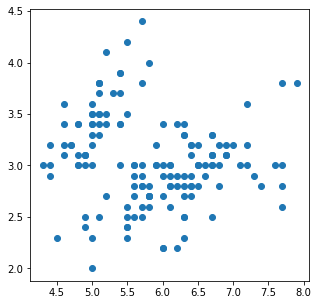

In [14]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)

ax.scatter(x=iris['SepalLengthCm'], y =iris['SepalWidthCm'])

plt.show()

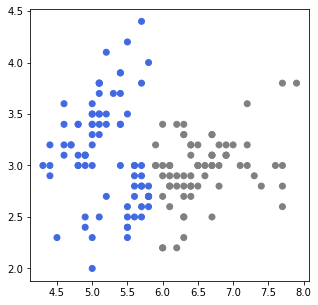

In [13]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)

slc_mean = iris['SepalLengthCm'].mean()
swc_mean = iris['SepalWidthCm'].mean()

# 조건문을 걸어 특정 조건에 따라 색을 다르게 설정 할 수 있다.
ax.scatter(x=iris['SepalLengthCm'], y =iris['SepalWidthCm'],
          c = ['royalblue' if xx <= slc_mean else 'gray'\
               for xx in iris['SepalLengthCm']])

plt.show()

Species의 구분에 따라 여러번 그려 자동으로 색 구분도 가능하게 할 수 있다.

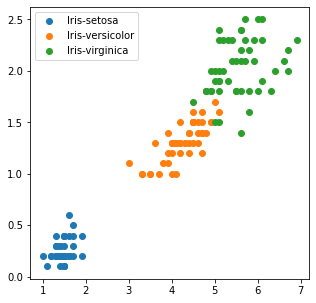

In [19]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)

for species in iris['Species'].unique():
    iris_sub = iris[iris['Species']==species]
    ax.scatter(x = iris_sub['PetalLengthCm'],
              y = iris_sub['PetalWidthCm'],
              label=species)
    
ax.legend()
plt.show()

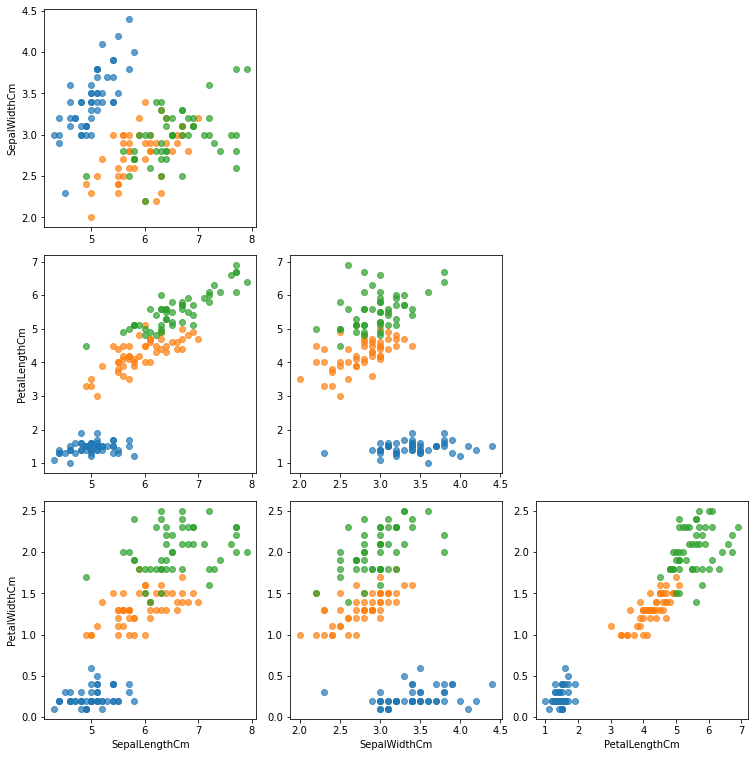

In [20]:
fig, axes = plt.subplots(4, 4, figsize=(14, 14))

feat = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

for i, f1 in enumerate(feat):
    for j, f2 in enumerate(feat):
        if i <= j : 
            axes[i][j].set_visible(False)
            continue
        for species in iris['Species'].unique():
            iris_sub = iris[iris['Species']==species]
            axes[i][j].scatter(x=iris_sub[f2], 
                               y=iris_sub[f1], 
                               label=species, 
                               alpha=0.7)
        if i == 3: axes[i][j].set_xlabel(f2)
        if j == 0: axes[i][j].set_ylabel(f1)

plt.tight_layout()        
plt.show()

#### 2.1. Overplotting
점이 많아질수록 점의 분포를 파악하기 힘들다.

**해결방법**
* 투명도 조정
* 지터링(jittering) : 점의 위치를 약간씩 변경
* 2차원 히스토그램 : 히트맵을 사용하여 깔끔히 시각화
* Contour plot : 분포를 등고선을 사용하여 표현

#### 2.2. 점의 요소와 인지

* 색
    * 연속은 gradient, 이산은 개별 색상으로
* 마커
    * 거의 구별하기 힘들며 크기가 고르지 않다.
* 크기
    * bubble chart라고 불리며, 구별하기 쉽지만 오용하기 쉽다(원의 크기 비교가 어려움)
    * 관계보다 각 점간 비율에 초점을 준다면 좋다
    * SWOT 분석 등에 활용 가능

#### 2.3. 인과관계와 상관관계

* 인과관계(causal relation)와 상관관계는 다르다.
* 인과관계는 항상 **사전 정보와 함께 가정으로 제시**


#### 2.4. 추세선

추세선을 사용하면 scatter의 패턴을 유추 할 수 있음
* 2개 이상 사용하면 가독성이 떨어짐

### 2.5. ETC
* Grid는 지양, 사용하면 최소한으로
    * 색은 무채색

* 범주형이 포함된 관계에서는 heatmap 또는 bubble chart 추천